## Submitted by : Tan Siew Ling NRIC:341F

## Problem Statement
## Objectives
Your objective is to predict the **occurrence of car failure** using the provided dataset for an automotive
company to formulate mitigative policies. In your submission, you are to evaluate at least 3 suitable
models for predicting car failure.

## Binary Classification problem - Failure or No Failure

### Import required packages

In [1]:
import sqlite3
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

### Load Data


In [2]:
# Create your connection.
sqliteConnection = sqlite3.connect('data/failure.db')
print("Connected to SQLite")
 
df = pd.read_sql_query("SELECT * FROM failure", sqliteConnection)

Connected to SQLite


## Task 1 - Exploratory Data Analysis (EDA)
  


### (A) Initial Analysis of Data

In [3]:
df.shape

(10081, 14)

In [4]:
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB




### Observations/Conclusions:
(1) There are 10081 car specifications

(2) 9 features - 7 strings, 1 integer and 1 float

(3) 5 target variables (Failure A,B,C,D,E) 
- integer data type with value of 1 for "Failure" and 0 for "No Failure"

(4) Missing data : Membership (categorical feature) - 384 cars with no Membership data

(5) Temperature feature is a combination of 2 features - temperature value and units.

(6) Factory feature is a combination of 2 features -  City and Country where Factory is located

(7) Model feature is a combination of 2 features - Model Number and Year

### Interpretation and Impact :

(1) Can only have 1 target variable - 5 target variables to be combined into one - Failure. 

- Failure = 1 for occurrence of any of the Failures A,B,C,D or E

- Failure = 0 for no occurrence of failure

(2) Missing data - to be drop or impute with mean/median/mode

(3) Car ID is just an identification for the car and is a useless feature. It should be dropped.

(4) Temperature, Model and Factory features -  each feature is combination of 2 features. Need to split these combined feature into the 2 individual features so that these individual features can be considered during model training.

In [6]:
df.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,1470.626823,679.472304,0.025692,0.018550,0.031049,0.024502,0.026386
std,487.502419,58.486101,0.158222,0.134935,0.173457,0.154608,0.160289
min,-2636.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1418.000000,638.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1499.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1609.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.000000



### Observations/Conclusions:
(1) features RPM and Fuel consumption have high variability or spread in the data 

(2) features have very different scales (RPM, Fuel consumption - large range). 

### Interpretation and Impact :
(1) Features with very different scales used in the experiment can distort the results during modelling. We can use feature scaling such as Min-max normalization or Standardization to transform the feature values so that they are on a common scale and still maintain their general distribution. This will usually give better results during modelling



In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent_1], axis=1, keys=['Missing', '%'])
missing_data

,Missing,%
Membership,384,3.809146
Car ID,0,0.000000
Model,0,0.000000
Color,0,0.000000
Temperature,0,0.000000
RPM,0,0.000000
Factory,0,0.000000
Usage,0,0.000000
Fuel consumption,0,0.000000
Failure A,0,0.000000



### Observations/Conclusions:
(1) Missing data : Membersip - 384 cars (3.81%)

### Interpretation and Impact :

(1) Missing data - less than 5% => Can be drop.
However, I would like to retain it by imputing with mean/median (to be determined later) so that we do not lose any records


### (B) Check Data Quality

In [8]:
def get_features(data):
    # Get list of numeric and categorical features
    num_vars=list(data.columns[data.dtypes != "object"])
    cat_vars=list(data.columns[data.dtypes=="object"])
    return (cat_vars,num_vars)

(categorical_vars,num_vars)=get_features(df)

print(num_vars)
print(categorical_vars)

['RPM', 'Fuel consumption', 'Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']
['Car ID', 'Model', 'Color', 'Temperature', 'Factory', 'Usage', 'Membership']


### (1) Check for Erroneous Value

### Categorical features

### Observations/Conclusions:
(1) Missing data : Membersip - 384 cars (3.81%)

### Interpretation and Impact :

(1) Missing data - less than 5% => Can be drop.
However, I would like to retain it by imputing with mean/median (to be determined later) so that we do not lose any records

In [9]:
for feature in categorical_vars:
  print(f'''======{feature}======''')
  #print(feature)
  print(df.groupby([feature]).size())

======Car ID======
Car ID
00044e46-1ddc-44b9-9d3c-5d3582827c79    1
00077c4b-6463-4cd6-8af0-8b5b6b3c4da4    1
000ce8f0-6ffe-47b1-98d8-5fed4297bcb1    1
001265b4-bb0a-4db9-a053-3f7de98278ff    1
00134611-270c-4049-b4b6-f4158d40c497    1
                                       ..
fff0c282-f8e3-4bff-a86c-0b5e08473067    1
fff0ee19-77b9-4f71-b129-e89b210dc31d    1
fff0fe96-e720-4b4d-9876-dba534690433    1
fffcbb25-2193-46b1-a96b-fca48131c798    1
fffe3d18-7038-49a0-8fb2-4785e5854502    1
Length: 10000, dtype: int64
======Model======
Model
Model 3, 2009      1
Model 3, 2010     31
Model 3, 2011    201
Model 3, 2012    564
Model 3, 2013    532
Model 3, 2014    559
Model 3, 2015    529
Model 3, 2016    590
Model 3, 2017    512
Model 3, 2018    546
Model 3, 2019    537
Model 3, 2020    566
Model 3, 2021    564
Model 3, 2022    318
Model 5, 2009      1
Model 5, 2010      7
Model 5, 2011     82
Model 5, 2012    275
Model 5, 2013    265
Model 5, 2014    291
Model 5, 2015    248
Model 5, 2016    29

Model


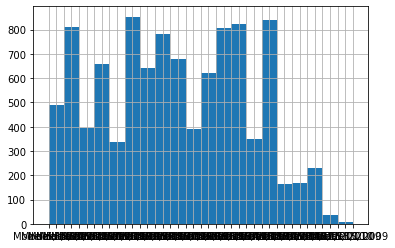

Color


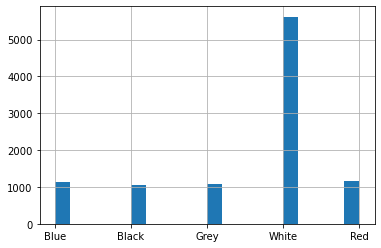

Temperature


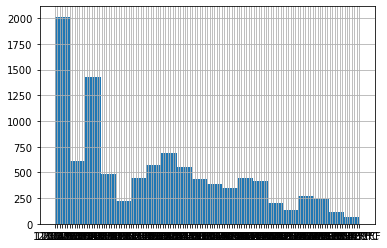

Factory


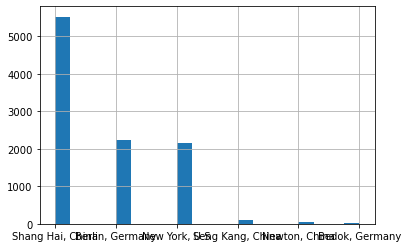

Usage


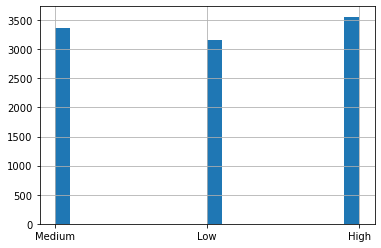

Membership


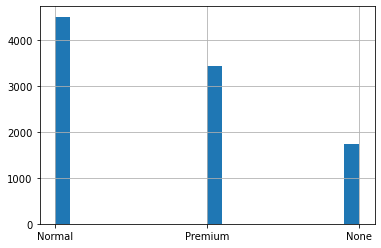

In [11]:

from matplotlib import pyplot as plt
#categorical feature

categorical_vars.remove("Car ID")

for feature in categorical_vars:
  print(feature)
  df[feature].hist(bins=20)
  plt.show()


### Observations/Conclusions:

(1) No erroneous data in the Categorical features except for Temperature

(2) Temperature feature include the units °F and °C, hence making it a non-numeric feature. 

### Interpretation and Impact :

(1) Temperature should be a numeric feature. We need to split the Temperature data into Temperature value and Temperature units

(2) There is also a mixture of units (Fahrenheit and Celsius) in the Temperature data so the value is not for the same units. 
We need to convert all the data to one common unit °C using the formula degree = Fahrenheit * -17.22


### numerical features

RPM


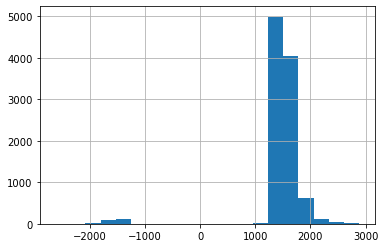

Fuel consumption


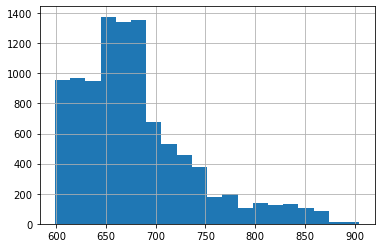

In [13]:

#numerical feature
num_vars.remove("Failure A")
num_vars.remove("Failure B")
num_vars.remove("Failure C")
num_vars.remove("Failure D")
num_vars.remove("Failure E")
for feature in num_vars:
  print(feature)
  df[feature].hist(bins=20)
  plt.show()

### Observations/Conclusions:

(1) No erroneous data in the Numerical features. RPM can have negative values.

(2) Skewness : RPM and Fuel Consumption data are skewed to the left and right respectively.

(3) Different Range : The above 2 numerical features have very different scales ( RPM (-2000 to 3000), Fuel Consumption (25100 600 to 900).

(4) Skewed Data = log transforamtion


### Interpretation and Impact :

(1) Skewness : Use Log to tranform the data (np.log())

(2) Different Range : This will distort the model algorithm as features with big scales may be given higher weightage. Transform the values using normalisation/standardisation so that the features can be on a common scale.

### (C) Data Preparation for Analysis (Part 1)

### (1) Data Cleaning -  Combine the 5 Target variables to 1 Target variable


In [14]:
df["Failure"]=0
df.loc[df["Failure A"]==1,["Failure"]]=1
df.loc[df["Failure B"]==1,["Failure"]]=1
df.loc[df["Failure C"]==1,["Failure"]]=1
df.loc[df["Failure D"]==1,["Failure"]]=1
df.loc[df["Failure E"]==1,["Failure"]]=1
#df.head()
#drop original target variables
drop_cols=["Failure A","Failure B","Failure C","Failure D","Failure E"]
df=df.drop(drop_cols,axis=1)

df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,1


In [15]:
df.describe()

,RPM,Fuel consumption,Failure
count,10081.000000,10081.000000,10081.000000
mean,1470.626823,679.472304,0.126178
std,487.502419,58.486101,0.332066
min,-2636.000000,598.500000,0.000000
25%,1418.000000,638.800000,0.000000
50%,1499.000000,668.500000,0.000000
75%,1609.000000,704.200000,0.000000
max,2886.000000,904.800000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure           10081 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 787.7+ KB


### (2) Feature Engineering - Create new features (Synthetic Features)


### (a) Model feature
(1)  Model feature is a combination of 2 features - Model Number and Year
- #### Assumption : 
  Assume that the year is the Year of Manufacture since this information is not given explicitly and it be used to calculate Age of Car which is likely to have correlation to the Car Failure 
- split the feature into 2 features - Model_num (string/object) and Year_of_Manufacture (integer)

(2) Create new feature - Age calculated from the Year of Manufactor. 

In [17]:
import datetime

current_year=datetime.datetime.now().year
print(current_year)

df[["Model_num","Year_of_Manufacture"]]= df["Model"].str.split(",",expand=True)
df["Year_of_Manufacture"]=df["Year_of_Manufacture"].astype(int)

df["Age"]= current_year - df["Year_of_Manufacture"]

df=df.drop("Model",axis=1)

df

2023


,Car ID,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure,Model_num,Year_of_Manufacture,Age
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,Model 5,2022,1
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,Model 3,2022,1
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,Model 3,2022,1
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,Model 3,2022,1
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,1,Model 3,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10076,64921ab7-c024-447a-8651-006a7e8a5e64,White,110.6 °C,1575,"Shang Hai, China",Low,728.5,Premium,0,Model 5,2020,3
10077,246aa846-094d-441a-814a-ecf64d4e3775,White,110.6 °C,1750,"Berlin, Germany",Low,698.9,Premium,0,Model 5,2020,3
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,Model 3,2019,4
10079,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,Model 3,2019,4


### (b) Factory feature
(1)  Factory feature is a combination of 2 features - Factory City and Factory Country
- #### Assumption : 
- split the feature into 2 features - Factory_City (string/object) and Factory_Country (string/object) 


In [18]:
df[["Factory_City","Factory_Country"]]= df["Factory"].str.split(",",expand=True)

df=df.drop("Factory",axis=1)

df

,Car ID,Color,Temperature,RPM,Usage,Fuel consumption,Membership,Failure,Model_num,Year_of_Manufacture,Age,Factory_City,Factory_Country
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,Blue,110.3 °C,1551,Medium,659.7,Normal,0,Model 5,2022,1,Shang Hai,China
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,Black,110.4 °C,1408,Medium,705.3,Premium,1,Model 3,2022,1,Shang Hai,China
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,Grey,110.3 °C,1498,Low,670.7,Premium,0,Model 3,2022,1,Shang Hai,China
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,Black,110.4 °C,1433,High,630.6,Premium,1,Model 3,2022,1,Berlin,Germany
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,White,230.7 °C,1408,High,660.9,Normal,1,Model 3,2022,1,New York,U.S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,64921ab7-c024-447a-8651-006a7e8a5e64,White,110.6 °C,1575,Low,728.5,Premium,0,Model 5,2020,3,Shang Hai,China
10077,246aa846-094d-441a-814a-ecf64d4e3775,White,110.6 °C,1750,Low,698.9,Premium,0,Model 5,2020,3,Berlin,Germany
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,White,110.6 °C,1529,Low,651.5,Normal,0,Model 3,2019,4,Shang Hai,China
10079,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,Blue,110.6 °C,1523,High,638.8,Premium,0,Model 3,2019,4,Berlin,Germany


### (c) Temperature feature
(1)  Temperature feature is a combination of 2 features - temperature value and units.
- split the feature into 2 features - Temp_value (float) an Temp_units (string/object)

(2) Mixture of values in Fahrenheit and Celsius
- convert Fahrenheit to Celsius using formula : Celsius =(Fahrenheit − 32) × 5/9 so that all temperature value will be in Celsius



#### Split the temperature value into 2 features - Temp_value (float) and Temp_units (string/object)

In [19]:
df[["Temperature_value","Temperature_units"]]=df["Temperature"].str.split(" ",expand=True)

df.head()


,Car ID,Color,Temperature,RPM,Usage,Fuel consumption,Membership,Failure,Model_num,Year_of_Manufacture,Age,Factory_City,Factory_Country,Temperature_value,Temperature_units
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,Blue,110.3 °C,1551,Medium,659.7,Normal,0,Model 5,2022,1,Shang Hai,China,110.3,°C
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,Black,110.4 °C,1408,Medium,705.3,Premium,1,Model 3,2022,1,Shang Hai,China,110.4,°C
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,Grey,110.3 °C,1498,Low,670.7,Premium,0,Model 3,2022,1,Shang Hai,China,110.3,°C
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,Black,110.4 °C,1433,High,630.6,Premium,1,Model 3,2022,1,Berlin,Germany,110.4,°C
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,White,230.7 °C,1408,High,660.9,Normal,1,Model 3,2022,1,New York,U.S,230.7,°C


#### Convert Fahrenheit to Celsius

In [20]:
#convert
df["Temperature_value"]=df["Temperature_value"].astype(float)
df.loc[df["Temperature_units"]=="°F", ["Temperature_value","Temperature_units"]]= ((df["Temperature_value"] - 32) *(5/9),"°C")

df.head()

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,Car ID,Color,Temperature,RPM,Usage,Fuel consumption,Membership,Failure,Model_num,Year_of_Manufacture,Age,Factory_City,Factory_Country,Temperature_value,Temperature_units
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,Blue,110.3 °C,1551,Medium,659.7,Normal,0,Model 5,2022,1,Shang Hai,China,43.500000,°C
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,Black,110.4 °C,1408,Medium,705.3,Premium,1,Model 3,2022,1,Shang Hai,China,43.555556,°C
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,Grey,110.3 °C,1498,Low,670.7,Premium,0,Model 3,2022,1,Shang Hai,China,43.500000,°C
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,Black,110.4 °C,1433,High,630.6,Premium,1,Model 3,2022,1,Berlin,Germany,43.555556,°C
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,White,230.7 °C,1408,High,660.9,Normal,1,Model 3,2022,1,New York,U.S,110.388889,°C


#### Check that no more Fahrenheit values

In [21]:
print(len(df[df["Temperature_units"]!="°C"]))
df[df["Temperature_units"]!="°C"]

0


,Car ID,Color,Temperature,RPM,Usage,Fuel consumption,Membership,Failure,Model_num,Year_of_Manufacture,Age,Factory_City,Factory_Country,Temperature_value,Temperature_units


#### Drop original feature - Temperature

In [22]:
df=df.drop("Temperature",axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car ID               10081 non-null  object 
 1   Color                10081 non-null  object 
 2   RPM                  10081 non-null  int64  
 3   Usage                10081 non-null  object 
 4   Fuel consumption     10081 non-null  float64
 5   Membership           9697 non-null   object 
 6   Failure              10081 non-null  int64  
 7   Model_num            10081 non-null  object 
 8   Year_of_Manufacture  10081 non-null  int32  
 9   Age                  10081 non-null  int32  
 10  Factory_City         10081 non-null  object 
 11  Factory_Country      10081 non-null  object 
 12  Temperature_value    2193 non-null   float64
 13  Temperature_units    10081 non-null  object 
dtypes: float64(2), int32(2), int64(2), object(8)
memory usage: 1024.0+ KB


### (3) Missing Data

### To determine whether to impute the missing data with Mean or Median or Mode


(1) Impute with Mean - Not suitable if the data is skewed (can be done for both numerical data only)

(2) Impute with Median - Good for skewed data (can be done for both numerical data only)

(3) Impute with Mode - Good for skewed data (can be done for both numerical and categorical data)


### Observations/Conclusions:
(1) Missing data - Membership is a Categorical features

### Interpretation and Impact :
(1) Hence, we can only impute with Mode.


### Missing data - Impute with mode

In [23]:
"""
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df)
  
df = imputer.transform(df)
df
"""


df['Membership'].fillna(df['Membership'].mode()[0], inplace=True)

df['Membership'].mode()[0]

'Normal'

### Observations/Conclusions:

- imputed missing data in Memebership feature with Mode - "Normal"



### (4) Drop Features

- Drop useless features - Car ID (use for identification of car), Temperature units (all data are value °C)

In [24]:
df=df.drop(columns=["Car ID","Temperature_units"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Color                10081 non-null  object 
 1   RPM                  10081 non-null  int64  
 2   Usage                10081 non-null  object 
 3   Fuel consumption     10081 non-null  float64
 4   Membership           10081 non-null  object 
 5   Failure              10081 non-null  int64  
 6   Model_num            10081 non-null  object 
 7   Year_of_Manufacture  10081 non-null  int32  
 8   Age                  10081 non-null  int32  
 9   Factory_City         10081 non-null  object 
 10  Factory_Country      10081 non-null  object 
 11  Temperature_value    2193 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(6)
memory usage: 866.5+ KB


### Analysis of Data (Part 1)

### (1) To determine if the dataset is unbalanced

<AxesSubplot:>

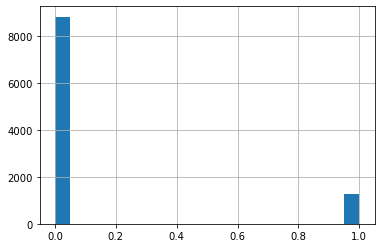

In [25]:
df["Failure"].hist(bins=20)

In [26]:
print(df.groupby("Failure").size())
df.groupby("Failure").size()/(len(df))

Failure
0    8809
1    1272
dtype: int64


Failure
0    0.873822
1    0.126178
dtype: float64

In [27]:
df['Failure'].describe()

count    10081.000000
mean         0.126178
std          0.332066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Failure, dtype: float64



### Observations/Conclusions:

(1) 87.4% of the cars did not fail. Only 12.6% failed. There are more cars that did not fail than cars that fail. The dataset is unbalanced. This is not an accurate representation of the population and the train and test set may be a biased one. This will result in poor model performance.

### Interpretation and Impact :
(1) We will need to do stratified sampling when splitting the dataset into Train and Test set to ensure that each set still retain the same ratio of failed and success.

### (2) Relationship between features and Target Variable - Failure

### categorical features

In [28]:
(categorical_vars,num_vars)=get_features(df)
print(categorical_vars)
print(num_vars)
df.info()

['Color', 'Usage', 'Membership', 'Model_num', 'Factory_City', 'Factory_Country']
['RPM', 'Fuel consumption', 'Failure', 'Year_of_Manufacture', 'Age', 'Temperature_value']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Color                10081 non-null  object 
 1   RPM                  10081 non-null  int64  
 2   Usage                10081 non-null  object 
 3   Fuel consumption     10081 non-null  float64
 4   Membership           10081 non-null  object 
 5   Failure              10081 non-null  int64  
 6   Model_num            10081 non-null  object 
 7   Year_of_Manufacture  10081 non-null  int32  
 8   Age                  10081 non-null  int32  
 9   Factory_City         10081 non-null  object 
 10  Factory_Country      10081 non-null  object 
 11  Temperature_value    2193 non-null   float64
dtypes: float64(2), 

### Color vs Failure

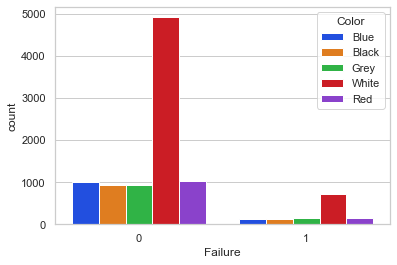

In [29]:
sns.set(style="whitegrid")
#sns.displot(df["Failure"], bins=10, kde=False, rug=False)
#sns.barplot(y="Failure", x="Color", palette="pastel",data=df)
#sns.stripplot(x="Failure", y="Color", data=df, jitter=True)
sns.countplot(x="Failure", hue='Color', palette="bright",data=df)
plt.show()

### Observations/Conclusions:

(1) Most of the cars are white. Hence, the cars that did not fail are mostly white cars.

(2) The cars that have failure are white cars.



### Usage vs Failure

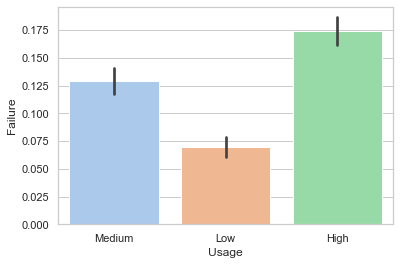

In [30]:
sns.set(style="whitegrid")
#sns.displot(df["Failure"], bins=10, kde=Fae, rug=False)
sns.barplot(y="Failure", x="Usage", palette="pastel",data=df)
#sns.stripplot(x="Failure", y="Usage", data=df, jitter=True)
#sns.countplot(x="Usage", hue='Failure', palette="deep",data=df)
plt.show()

### Observations/Conclusions:

(1) High usage cars are more likely to fail due to constant wear and tear.

(2) Low usage cars are least likely to fail.


### Membership vs Failure

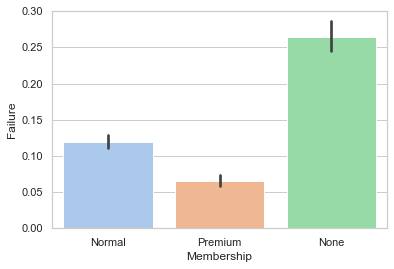

In [31]:
sns.set(style="whitegrid")
#sns.displot(df["Failure"], bins=10, kde=Fae, rug=False)
sns.barplot(y="Failure", x="Membership", palette="pastel",data=df)
#sns.stripplot(x="Failure", y="Membership", data=df, jitter=True)
#sns.countplot(x="Membership", hue='Failure', palette="deep",data=df)
plt.show()

### Observations/Conclusions:

(1) Cars with no membership more likely to fail as they are not serviced regularly.

(2) Cars with Premium membership are least likely to fail as they are serviced more regularly than Normal or No membership


### Model number vs Failure

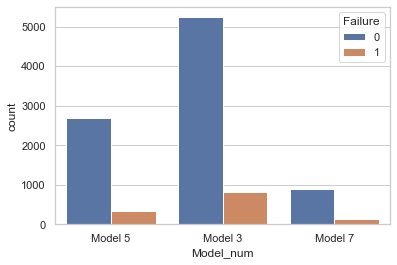

In [32]:
sns.set(style="whitegrid")
#sns.displot(df["Failure"], bins=10, kde=Fae, rug=False)
#sns.barplot(y="Failure", x="Model_num", palette="pastel",data=df)
#sns.stripplot(x="Failure", y="Model_num", data=df, jitter=True)
sns.countplot(x="Model_num", hue='Failure', palette="deep",data=df)
plt.show()

### Observations/Conclusions:

(1) Most cars are of Model 3. There are few cars of Model 7.

(2) Hence, there are more cars of Model 3 that have failure.





### Factory city vs Failure

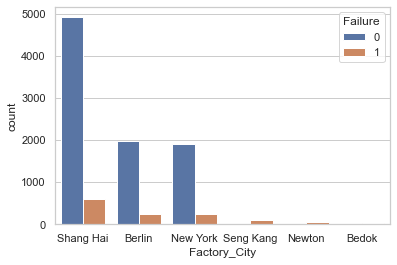

In [33]:
sns.set(style="whitegrid")
#sns.displot(df["Failure"], bins=10, kde=Fae, rug=False)
#sns.barplot(y="Failure", x="Factory_City", palette="pastel",data=df)
#sns.stripplot(x="Failure", y="Factory_City", data=df, jitter=True)
sns.countplot(x="Factory_City", hue='Failure', palette="deep",data=df)
plt.show()

In [34]:
df.groupby(["Factory_City"]).size()

Factory_City
Bedok          30
Berlin       2233
New York     2150
Newton         44
Seng Kang     106
Shang Hai    5518
dtype: int64

### Observations/Conclusions:

(1) Most cars are manufactured in Shanghai Factory. 

(2) Shanghai Factory-made cars are likely to fail than cars manufactured in other factories.



### Factory country vs Failure

In [35]:
df.groupby(["Factory_Country"]).size()

Factory_Country
 China      5668
 Germany    2263
 U.S        2150
dtype: int64

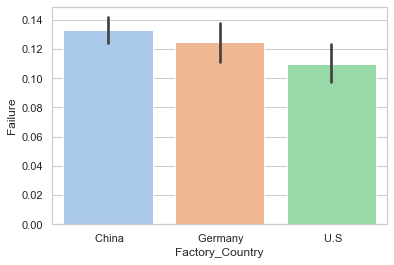

In [36]:
sns.set(style="whitegrid")
#sns.displot(df["Failure"], bins=10, kde=Fae, rug=False)
sns.barplot(y="Failure", x="Factory_Country", palette="pastel",data=df)
#sns.stripplot(x="Failure", y="Factory_Country", data=df, jitter=True)
#sns.countplot(x="Factory_Country", hue='Failure', palette="deep",data=df)
plt.show()

### Observations/Conclusions:

(1) Cars manufactured by the Factory in China is more likely to fail. Those manufactured in US is least likely to fail.

### Numerical Features

In [37]:
num_vars


['RPM',
 'Fuel consumption',
 'Failure',
 'Year_of_Manufacture',
 'Age',
 'Temperature_value']

### RPM vs Failure

<AxesSubplot:xlabel='Failure', ylabel='RPM'>

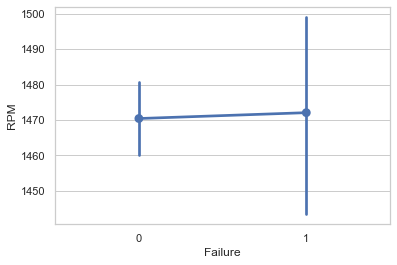

In [38]:
#fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
#sns.barplot(x='Age', y='Failure', data=df, ax = axis1)
#sns.barplot(x='Age', y='Failure', data=df, ax = axis2)
sns.pointplot(x = 'Failure', y = 'RPM', data=df)

### Observations/Conclusions:

(1) Cars with RPM between 1460 and 1480 are least likely to fail.


### Fuel Consumption vs Failure

<AxesSubplot:>

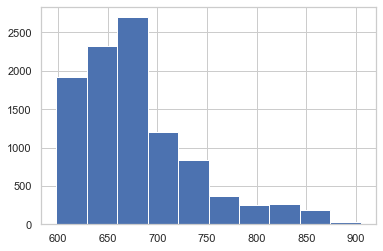

In [39]:
df["Fuel consumption"].hist(bins=10)

<AxesSubplot:xlabel='Failure', ylabel='Fuel consumption'>

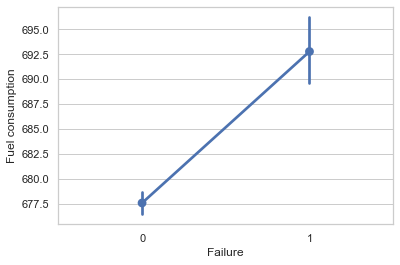

In [40]:
#fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
#sns.barplot(x='Age', y='Failure', data=df, ax = axis1)
#sns.barplot(x='Age', y='Failure', data=df, ax = axis2)
sns.pointplot(x = 'Failure', y = 'Fuel consumption', data=df)

### Observations/Conclusions:

(1) Cars with Fuel consumption < 680  are least likely to fail.


### Year of Manufacture vs Failure

<AxesSubplot:xlabel='Year_of_Manufacture', ylabel='Failure'>

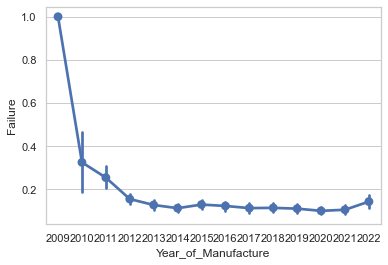

In [41]:
#fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
#sns.barplot(x='Age', y='Failure', data=df, ax = axis1)
#sns.barplot(x='Age', y='Failure', data=df, ax = axis2)
sns.pointplot(x = 'Year_of_Manufacture', y = 'Failure', data=df)

### Observations/Conclusions:

(1) Cars that were manufactured between 2009 and 2011 are more likely to fail.


### Age vs Failure

<AxesSubplot:>

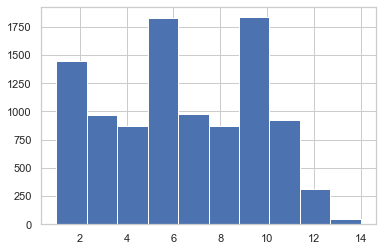

In [42]:
df["Age"].hist(bins=10)

<AxesSubplot:xlabel='Age', ylabel='Failure'>

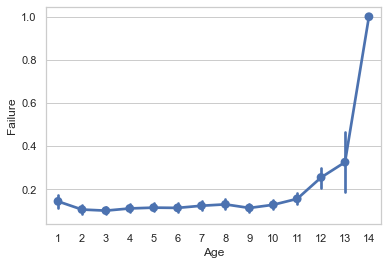

In [43]:
#fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
#sns.barplot(x='Age', y='Failure', data=df, ax = axis1)
#sns.barplot(x='Age', y='Failure', data=df, ax = axis2)
sns.pointplot(x = 'Age', y = 'Failure', data=df)

### Observations/Conclusions:

(1) Cars with age greater than 11 years are more likely to fail.

(2) This is aligned with the analysis on Year of Manufacture where cars manufactured between 2009 (age=14) and 2011 (Age=12)

(3) These 2 features are the same so we can drop one of them - Year of Manufacture


In [44]:
df=df.drop(columns=["Year_of_Manufacture"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Color              10081 non-null  object 
 1   RPM                10081 non-null  int64  
 2   Usage              10081 non-null  object 
 3   Fuel consumption   10081 non-null  float64
 4   Membership         10081 non-null  object 
 5   Failure            10081 non-null  int64  
 6   Model_num          10081 non-null  object 
 7   Age                10081 non-null  int32  
 8   Factory_City       10081 non-null  object 
 9   Factory_Country    10081 non-null  object 
 10  Temperature_value  2193 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 827.1+ KB


### Temperature value vs Failure

<AxesSubplot:>

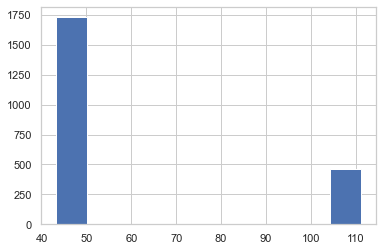

In [45]:
df["Temperature_value"].hist(bins=10)

<AxesSubplot:xlabel='Failure', ylabel='Temperature_value'>

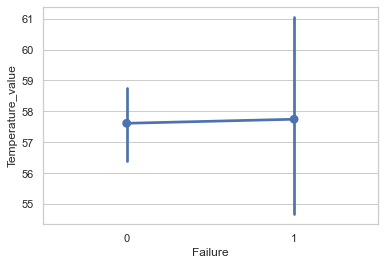

In [46]:
#fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
#sns.barplot(x='Age', y='Failure', data=df, ax = axis1)
#sns.barplot(x='Failure', y='Temperature_value', data=df)
sns.pointplot(x = 'Failure', y = 'Temperature_value', data=df)

### Observations/Conclusions:

(1) Cars with temperature range between 56.5 and 58.8 are least likely to fail.


### Data Preparation (Part 2)


### Encode categorical features to numeric 
- Most models work only with numeric continous data
- using integers to represent each category is not sufficient as models would interpret te categories as being ordered
- So need to do One Hot Encoding or Dummy Encoding



In [47]:
df.dtypes

Color                 object
RPM                    int64
Usage                 object
Fuel consumption     float64
Membership            object
Failure                int64
Model_num             object
Age                    int32
Factory_City          object
Factory_Country       object
Temperature_value    float64
dtype: object

### Dummy Encode Categorical Feature

In [48]:
#Dummy Encode all the categorical features 
#so that they can be processed by the model algorithms

df = pd.get_dummies(df,columns=categorical_vars)
df.head(2)

,RPM,Fuel consumption,Failure,Age,Temperature_value,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_White,...,Model_num_Model 7,Factory_City_Bedok,Factory_City_Berlin,Factory_City_New York,Factory_City_Newton,Factory_City_Seng Kang,Factory_City_Shang Hai,Factory_Country_ China,Factory_Country_ Germany,Factory_Country_ U.S
0,1551,659.7,0,1,43.500000,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1408,705.3,1,1,43.555556,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [49]:
df.dtypes

RPM                           int64
Fuel consumption            float64
Failure                       int64
Age                           int32
Temperature_value           float64
Color_Black                   uint8
Color_Blue                    uint8
Color_Grey                    uint8
Color_Red                     uint8
Color_White                   uint8
Usage_High                    uint8
Usage_Low                     uint8
Usage_Medium                  uint8
Membership_None               uint8
Membership_Normal             uint8
Membership_Premium            uint8
Model_num_Model 3             uint8
Model_num_Model 5             uint8
Model_num_Model 7             uint8
Factory_City_Bedok            uint8
Factory_City_Berlin           uint8
Factory_City_New York         uint8
Factory_City_Newton           uint8
Factory_City_Seng Kang        uint8
Factory_City_Shang Hai        uint8
Factory_Country_ China        uint8
Factory_Country_ Germany      uint8
Factory_Country_ U.S        

In [50]:
# Since all values are numeric, do a correlation and sort to determine
# the most important features relative to Survived
corr = df.corr()
corr.sort_values(["Failure"], ascending = False, inplace = True)
print(corr.Failure)

Failure                     1.000000
Factory_City_Seng Kang      0.271279
Membership_None             0.190149
Factory_City_Newton         0.174239
Factory_City_Bedok          0.143772
Usage_High                  0.106223
Fuel consumption            0.086386
Age                         0.052092
Model_num_Model 3           0.030262
Factory_Country_ China      0.023378
Color_Grey                  0.012701
Usage_Medium                0.006364
Color_Black                 0.002918
Color_Red                   0.002331
Temperature_value           0.001607
RPM                         0.001126
Model_num_Model 7           0.000306
Color_White                -0.000901
Factory_Country_ Germany   -0.002535
Color_Blue                 -0.016267
Membership_Normal          -0.018767
Factory_City_Berlin        -0.021406
Factory_City_New York      -0.025732
Factory_Country_ U.S       -0.025732
Model_num_Model 5          -0.032567
Factory_City_Shang Hai     -0.055366
Usage_Low                  -0.115879
M

### Observations/Conclusions:

(1) 3 Features with correlation almost close to 0 (-0.01< correlation <0.01) can be dropped.

(a) Color 

(b) RPM

(c) Temperature_value


### Interpretation and Impact :
Hence, we will do the modelling using these 7 features:

(1) Model Number

(2) Usage

(3) Fuel consumption

(4) Memebership

(5) Age

(6) Factory_City

(7) Factory_Country